# **Limpieza de datos**

### En este archivo visualizaremos, limpiaremos y analizaremos los datos de la carpeta data.

Comenzamos importando todas las dependecias necesarias para el correcto funcionamiento del documento, aunque primero hay que asegurarnos que las tenemos instaladas.

In [283]:
# Instalamos librerías
%pip install pandas
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [284]:
# Importamos librerías
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

El siguiente paso es cargar los datos.

In [285]:
# Cargamos los datos
equipos = pd.read_csv('../data/equipos.csv')
overall = pd.read_csv('../data/overall.csv')
partidos = pd.read_csv('../data/partidos.csv')

Ahora iremos analizando tabla por tabla.

## Tabla Equipos

Comenzamos mostrando su dimensión y sus primeras filas para ver que información contiene.

In [286]:
print(equipos.shape)
equipos.head()

(640, 17)


,Season,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR
0,2022-2023,nlAjax,19,26.4,53.2,6,66,540,6.0,11,9,20,10,1,1,15.0,1.0
1,2022-2023,esAtlético Madrid,22,28.6,56.5,6,66,540,6.0,4,3,7,4,0,2,11.0,0.0
2,2022-2023,esBarcelona,26,26.4,64.8,6,66,540,6.0,12,10,22,12,0,0,9.0,0.0
3,2022-2023,deBayern Munich,24,26.6,56.1,10,110,900,10.0,21,19,40,20,1,1,20.0,1.0
4,2022-2023,ptBenfica,24,26.0,52.9,10,110,900,10.0,25,16,41,20,5,5,19.0,0.0


Vemos que tenemos una tabla con 16 columnas y 640 filas. Hablemos de lo que es cada columna:
- 'Season' nos dice de qué temporada es el dato.
- 'Squad' es el nombre del equipo de fútbol.
- '# Pl' es el número de jugadores que se han usado en los partidos.
- 'Age' nos dice la edad media de los jugadores del equipo.
- 'Poss' es la posesión del equipo de la pelota, que se calcula como el porcentaje de intentos de pasos.
- 'MP' es el número de partidos jugados.
- 'Starts' son los partidos empezados por el jugador.
- 'Min' son los minutos que ha jugado el equipo.
- '90s' es el número de minutos jugados partido de 90.
- 'Gls' son los goles marcados o permitidos.
- 'Ast' asistencias (pase que un jugador realiza a un compañero de equipo y que resulta en un gol).
- 'G + A', goles y asistencias.
- 'G - PK' nos dice los goles que no vienen de penales.
- 'PK' son los goles que sí que vienen de penales.
- 'PKatt' nos dice cuales son los tiros que han hecho por penales (cuenta los que han sido gol y los que no).
- 'CrdY', las tarjetas amarillas que ha tenido el equipo a lo largo del campeonato. 
- 'CrdR', las tarjetas rojas que ha tenido el equipo a lo largo del campeonato.

Una vez vista la información que contiene esta tabla, veamos si tiene datos nulos y si el tipo de datos de cada columna es el correcto.

In [287]:
equipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Season  640 non-null    object 
 1   Squad   640 non-null    object 
 2   # Pl    640 non-null    int64  
 3   Age     640 non-null    float64
 4   Poss    288 non-null    float64
 5   MP      640 non-null    int64  
 6   Starts  640 non-null    int64  
 7   Min     288 non-null    object 
 8   90s     288 non-null    float64
 9   Gls     640 non-null    int64  
 10  Ast     640 non-null    int64  
 11  G+A     640 non-null    int64  
 12  G-PK    640 non-null    int64  
 13  PK      640 non-null    int64  
 14  PKatt   640 non-null    int64  
 15  CrdY    576 non-null    float64
 16  CrdR    576 non-null    float64
dtypes: float64(5), int64(9), object(3)
memory usage: 85.1+ KB


Vemos que hay algunas columnas que tienen más de la mitad de los valores nulos. Vamos a borrarlas.

In [288]:
equipos = equipos.drop(columns=['Poss', 'Min', '90s'])
equipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Season  640 non-null    object 
 1   Squad   640 non-null    object 
 2   # Pl    640 non-null    int64  
 3   Age     640 non-null    float64
 4   MP      640 non-null    int64  
 5   Starts  640 non-null    int64  
 6   Gls     640 non-null    int64  
 7   Ast     640 non-null    int64  
 8   G+A     640 non-null    int64  
 9   G-PK    640 non-null    int64  
 10  PK      640 non-null    int64  
 11  PKatt   640 non-null    int64  
 12  CrdY    576 non-null    float64
 13  CrdR    576 non-null    float64
dtypes: float64(3), int64(9), object(2)
memory usage: 70.1+ KB


Podemos cambiar las columnas objeto (Season y Squad) a str.

In [289]:
# Pasamos a string
equipos['Season'] = equipos['Season'].astype('string')
equipos['Squad'] = equipos['Squad'].astype('string')

# Nos aseguramos de que se hayan hecho los cambios correctamente
equipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Season  640 non-null    string 
 1   Squad   640 non-null    string 
 2   # Pl    640 non-null    int64  
 3   Age     640 non-null    float64
 4   MP      640 non-null    int64  
 5   Starts  640 non-null    int64  
 6   Gls     640 non-null    int64  
 7   Ast     640 non-null    int64  
 8   G+A     640 non-null    int64  
 9   G-PK    640 non-null    int64  
 10  PK      640 non-null    int64  
 11  PKatt   640 non-null    int64  
 12  CrdY    576 non-null    float64
 13  CrdR    576 non-null    float64
dtypes: float64(3), int64(9), string(2)
memory usage: 70.1 KB


Lo siguiente que podemos hacer es ver que en la columna de 'Squad' aparece junto al nombre del equipo una abreviatura del país al que pertece. No nos interesa tenerlo en este formato, así que vamos a iterar sobre los valores de esta columna, eliminar la abreviatura de este país y añadir una nueva columna al lado que sea indique el país al que pertenece el equipo. Haremos esto haciendo uso del siguiente diccionario.

In [290]:
# Creamos un diccionario con los paises y sus abreviaturas
paises_dict = {
    'Alemania': 'de',
    'España': 'es',
    'Inglaterra': 'eng',
    'Italia': 'it',
    'Francia': 'fr',
    'Países bajos': 'nl',
    'Portugal': 'pt',
    'Bélgica': 'be',
    'Escocia': 'sct',
    'Irlanda': 'ie',
    'Gales': 'wal',
    'República checa': 'cz',
    'Polonia': 'pl',
    'Suiza': 'ch',
    'Austria': 'at',
    'Dinamarca': 'dk',
    'Suecia': 'se',
    'Noruega': 'no',
    'Eslovenia': 'si',
    'Eslovaquia': 'sk',
    'Hungría': 'hu',
    'Rumanía': 'ro',
    'Bulgaria': 'bg',
    'Croacia': 'hr',
    'Serbia': 'rs',
    'Grecia': 'gr',
    'Moldavia': 'md',
    'Chipre': 'cy',
    'Rusia': 'ru',
    'Bielorrusia': 'by',
    'Ucrania': 'ua',
    'Turquía': 'tr',
    'Israel': 'il',
    'Azerbaiyán': 'az',
    'Kazajistán': 'kz'
}

# Donde almacenaremos los paises para agregar al dataframe como nueva columna
paises = []

# Iteramos sobre la columna 'Squad'
for i, equipo in enumerate(equipos['Squad']):
    # Iteramos sobre el diccionario de paises
    for key, value in paises_dict.items():
        # Si el nombre del equipo comienza o termina con el valor del diccionario
        if equipo.startswith(value) or equipo.endswith(value):
            equipos.loc[i, 'Squad'] = equipo.replace(value, '')
            paises.append(key)
            break
        
# Agregamos la columna 'Country' al dataframe en la posición 2
equipos.insert(2, 'Country', paises)

# Nos aseguramos de que se haya agregado correctamente
equipos.head()

,Season,Squad,Country,# Pl,Age,MP,Starts,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR
0,2022-2023,Ajax,Países bajos,19,26.4,6,66,11,9,20,10,1,1,15.0,1.0
1,2022-2023,Atlético Madrid,España,22,28.6,6,66,4,3,7,4,0,2,11.0,0.0
2,2022-2023,Barcelona,España,26,26.4,6,66,12,10,22,12,0,0,9.0,0.0
3,2022-2023,Bayern Munich,Alemania,24,26.6,10,110,21,19,40,20,1,1,20.0,1.0
4,2022-2023,Benfica,Portugal,24,26.0,10,110,25,16,41,20,5,5,19.0,0.0


Una vez limpio el dataset, hagamos unas gráficas.

Por ejemplo, veamos que país es el que marca más goles. Podríamos hacer lo mismo con equipos en vez de países, pero son muchos equipos diferentes lo cual podría dificultar la visibilidad de la gráfica. 

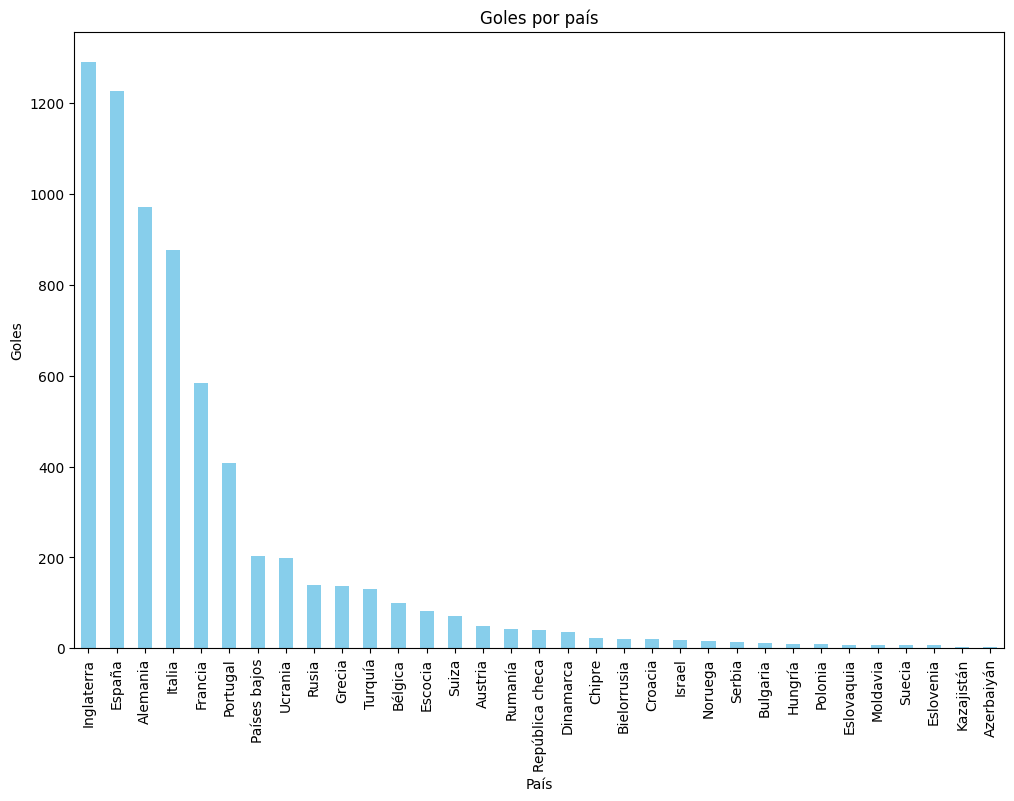

In [291]:
# Primero agrupamos por país 
goles_por_pais = equipos.groupby('Country')['Gls'].sum().sort_values(ascending=False)

# Graficamos
plt.figure(figsize=(12, 8))
goles_por_pais.plot(kind='bar', color='skyblue')
plt.title('Goles por país')
plt.xlabel('País')
plt.ylabel('Goles')
plt.show()

Podemos hacer lo mismo con la edad, las tarjetas rojas y las tarjetas amarillas. Sin embargo, no buscamos que nos sume todas las edades, buscamos que nos haga la media de las edades.

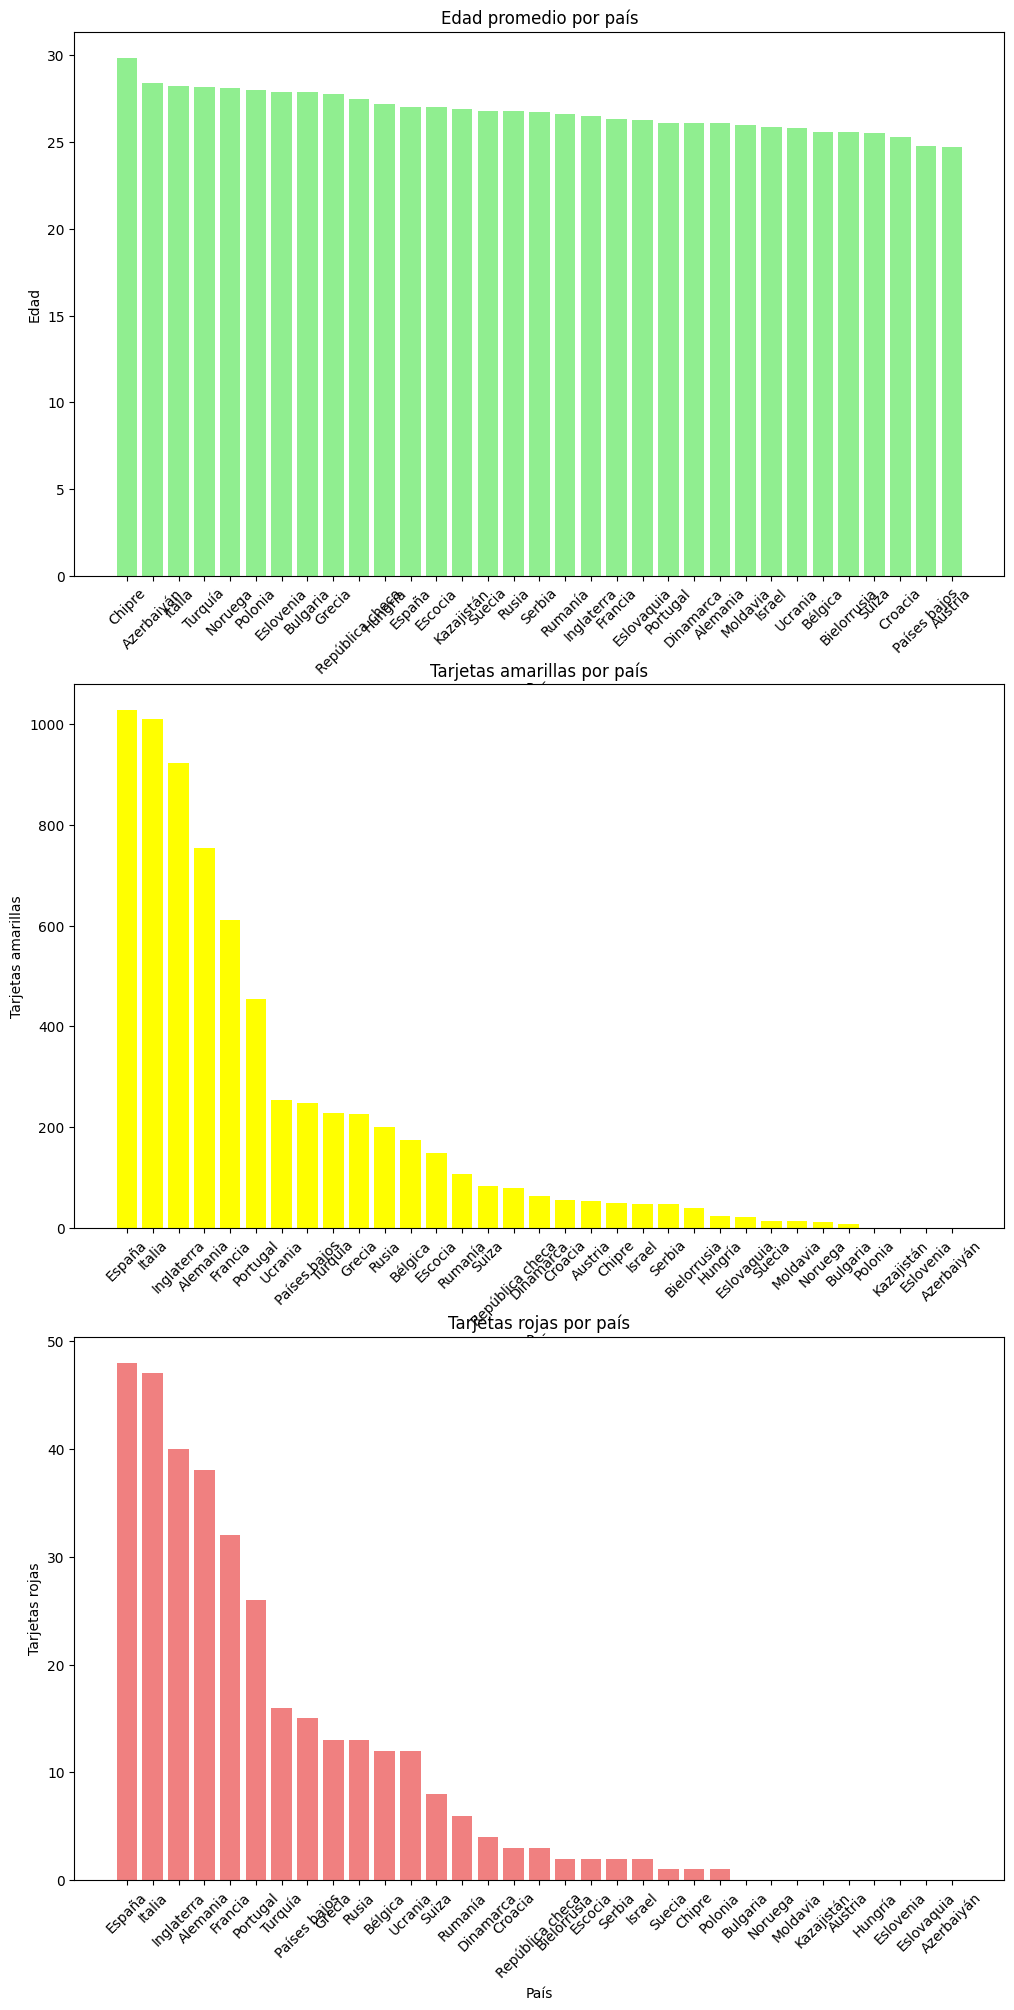

In [292]:
# Primero agrupamos 
edad_por_pais = equipos.groupby('Country')['Age'].mean().sort_values(ascending=False) # Edad promedio
crdy_por_pais = equipos.groupby('Country')['CrdY'].sum().sort_values(ascending=False)
crdr_por_pais = equipos.groupby('Country')['CrdR'].sum().sort_values(ascending=False)

# Graficamos
fg, ax = plt.subplots(3, 1, figsize=(12, 24))

ax[0].bar(edad_por_pais.index, edad_por_pais, color='lightgreen')
ax[0].set_title('Edad promedio por país')
ax[0].set_xlabel('País')
ax[0].set_ylabel('Edad')
ax[0].tick_params(axis='x', rotation=45)  # Rotar las etiquetas del eje x en 45 grados

ax[1].bar(crdy_por_pais.index, crdy_por_pais, color='yellow')
ax[1].set_title('Tarjetas amarillas por país')
ax[1].set_xlabel('País')
ax[1].set_ylabel('Tarjetas amarillas')
ax[1].tick_params(axis='x', rotation=45)  # Rotar las etiquetas del eje x en 45 grados

ax[2].bar(crdr_por_pais.index, crdr_por_pais, color='lightcoral')
ax[2].set_title('Tarjetas rojas por país')
ax[2].set_xlabel('País')
ax[2].set_ylabel('Tarjetas rojas')
ax[2].tick_params(axis='x', rotation=45)  # Rotar las etiquetas del eje x en 45 grados

plt.show()

Terminamos el análisis de la tabla de equipos. Pasemos a la siguiente

## Tabla Overall

Empezamos visualizando los datos.

In [293]:
print(overall.shape)
overall.head()

(740, 15)


,Season,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Attendance,Top Team Scorer,Goalkeeper,Notes
0,2022-2023,1,engManchester City,13.0,8.0,5.0,0.0,32.0,5.0,27.0,29.0,"63,639",Erling Haaland-12,Ederson,NaN
1,2022-2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-2023,2,itInter,13.0,7.0,3.0,3.0,19.0,11.0,8.0,24.0,"71,415",Edin Džeko-4,André Onana,NaN
3,2022-2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-2023,SF,esReal Madrid,12.0,8.0,2.0,2.0,26.0,13.0,13.0,26.0,"58,761",Vinicius Júnior-7,Thibaut Courtois,NaN


Vemos que tenemos 740 filas y 15 columnas. Hablemos de las columnas:
- 'Season' es la temporada a la que pertenece la información de esa fila.
- 'Rk' es el puesto en el que ha quedado ese equipo en esa temporada.
- 'Squad' es el equipo.
- 'MP', el número de partidos jugados.
- 'W' el número de victorias.
- 'D' el número de empates.
- 'L' el número de derrotas.
- 'GF' los goles a favor.
- 'GA' los goles en contra. 
- 'GD' la diferencia de los goles (GF - GA).
- 'Pts' son los puntos de la liga (3 puntos si ganas, 1 por empate).
- 'Attendance', asistencia por partido durante esta temporada, solo para partidos en casa.
- 'Top Team Scorer', el jugador con más goles de los partidos de las ligas de esa temporada.
- 'Goalkeeper', el portero del equipo con más minutos jugado en el torneo.
- 'Notes', notas para añadir información a la fila.

Veamos los tipos de datos de cada columna y sus valores nulos.

In [294]:
overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Season           740 non-null    object 
 1   Rk               640 non-null    object 
 2   Squad            640 non-null    object 
 3   MP               640 non-null    float64
 4   W                640 non-null    float64
 5   D                640 non-null    float64
 6   L                640 non-null    float64
 7   GF               640 non-null    float64
 8   GA               640 non-null    float64
 9   GD               640 non-null    float64
 10  Pts              640 non-null    float64
 11  Attendance       625 non-null    object 
 12  Top Team Scorer  637 non-null    object 
 13  Goalkeeper       640 non-null    object 
 14  Notes            9 non-null      object 
dtypes: float64(8), object(7)
memory usage: 86.8+ KB


Vemos que la útima columna está casi vacía. Como apenas nos aporta información, la borraremos. 

Además, podemos cambiar el tipo de datos de las columnas 'Season', 'Rk', 'Squad', 'Top Team Scorer' y 'Goalkeeper' a strings. La columna 'Attendance', a pesar de ser un dato numérico, lo convertiremos también a string ya que tiene algunos valores nulos que no nos permitirán hacer la conversión de tipo de dato a numérico, pero conservaremos la columna porque nos puede aportar información importante.

In [295]:
# Eliminamos las columnas que no nos interesan
overall = overall.drop(columns=['Notes'])

# Convertimos las columnas a string
overall['Season'] = overall['Season'].astype('string')
overall['Rk'] = overall['Rk'].astype('string')
overall['Squad'] = overall['Squad'].astype('string')
overall['Attendance'] = overall['Attendance'].astype('string')
overall['Top Team Scorer'] = overall['Top Team Scorer'].astype('string')
overall['Goalkeeper'] = overall['Goalkeeper'].astype('string')

# Nos aseguramos de que se hayan hecho los cambios correctamente
overall.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Season           740 non-null    string 
 1   Rk               640 non-null    string 
 2   Squad            640 non-null    string 
 3   MP               640 non-null    float64
 4   W                640 non-null    float64
 5   D                640 non-null    float64
 6   L                640 non-null    float64
 7   GF               640 non-null    float64
 8   GA               640 non-null    float64
 9   GD               640 non-null    float64
 10  Pts              640 non-null    float64
 11  Attendance       625 non-null    string 
 12  Top Team Scorer  637 non-null    string 
 13  Goalkeeper       640 non-null    string 
dtypes: float64(8), string(6)
memory usage: 81.1 KB


A simple vista se puede ver que hay filas que tienen todos los datos vacíos a excepción de la temporada. Borremos estas filas.

In [296]:
# Con la cariable thresh le decimos que queremos que elimine las filas que tengan al menos dos valores nulos
# También reseteamos el índice
overall = overall.dropna(thresh=2).reset_index(drop=True)

# Nos aseguramos de que se hayan eliminado correctamente
print(overall.shape)
overall.head()

(640, 14)


,Season,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Attendance,Top Team Scorer,Goalkeeper
0,2022-2023,1,engManchester City,13.0,8.0,5.0,0.0,32.0,5.0,27.0,29.0,"63,639",Erling Haaland-12,Ederson
1,2022-2023,2,itInter,13.0,7.0,3.0,3.0,19.0,11.0,8.0,24.0,"71,415",Edin Džeko-4,André Onana
2,2022-2023,SF,esReal Madrid,12.0,8.0,2.0,2.0,26.0,13.0,13.0,26.0,"58,761",Vinicius Júnior-7,Thibaut Courtois
3,2022-2023,SF,itMilan,12.0,5.0,3.0,4.0,15.0,11.0,4.0,18.0,"72,546",Olivier Giroud-5,Mike Maignan
4,2022-2023,QF,deBayern Munich,10.0,8.0,1.0,1.0,22.0,6.0,16.0,25.0,"75,000","Leroy Sané,Eric Maxim Choupo-Moting-4",Yann Sommer


Hemos eliminado 100 filas del dataframe.

Al igual que en la tabla anterior, los equipos tienen junto a su nombre la abreviación del país del que vienen. Quitemos esa abreviación y agregemos una columna nueva con el país.

In [297]:
# Donde almacenaremos los paises para agregar al dataframe como nueva columna
paises = []

# Iteramos sobre la columna 'Squad'
for i, fila in enumerate(overall['Squad']):
    # Iteramos sobre el diccionario de paises
    for key, value in paises_dict.items():
        # Si el nombre del equipo comienza o termina con el valor del diccionario, pero primero verificamos que sea un string
        if (fila.startswith(value) or fila.endswith(value)):
            overall.loc[i, 'Squad'] = fila.replace(value, '')
            paises.append(key)
            break 

# Agregamos la columna 'Country' al dataframe en la posición 3
overall.insert(3, 'Country', paises)

# Nos aseguramos de que se haya agregado correctamente
overall.head()

,Season,Rk,Squad,Country,MP,W,D,L,GF,GA,GD,Pts,Attendance,Top Team Scorer,Goalkeeper
0,2022-2023,1,Manchester City,Inglaterra,13.0,8.0,5.0,0.0,32.0,5.0,27.0,29.0,"63,639",Erling Haaland-12,Ederson
1,2022-2023,2,Inter,Italia,13.0,7.0,3.0,3.0,19.0,11.0,8.0,24.0,"71,415",Edin Džeko-4,André Onana
2,2022-2023,SF,Real Madrid,España,12.0,8.0,2.0,2.0,26.0,13.0,13.0,26.0,"58,761",Vinicius Júnior-7,Thibaut Courtois
3,2022-2023,SF,Milan,Italia,12.0,5.0,3.0,4.0,15.0,11.0,4.0,18.0,"72,546",Olivier Giroud-5,Mike Maignan
4,2022-2023,QF,Bayern Munich,Alemania,10.0,8.0,1.0,1.0,22.0,6.0,16.0,25.0,"75,000","Leroy Sané,Eric Maxim Choupo-Moting-4",Yann Sommer


Veamos que valores puede tomar la columna 'Rk'.

In [298]:
rankings = overall['Rk'].value_counts()
print(rankings)


Rk
GR     320
R16    160
QF      80
SF      40
W       18
F       18
1        2
2        2
Name: count, dtype: Int64


Vemos que hay algunos que valen '1' y '2', que serían equivalentes a 'W' y 'F' respectivamente. Cambiémoslo para que sean iguales.

In [299]:
# Reemplazamos los valores de la columna 'Rk' por 'W' y 'F' 
overall['Rk'] = overall['Rk'].replace('1', 'W')
overall['Rk'] = overall['Rk'].replace('2', 'F')

rankings = overall['Rk'].value_counts()
print(rankings)

Rk
GR     320
R16    160
QF      80
SF      40
W       20
F       20
Name: count, dtype: Int64


Ahora, comenzemos a graficar. Podemos hacer un pie chart de los rankings que ha tenido España a lo largo de la historia de la UEFA.

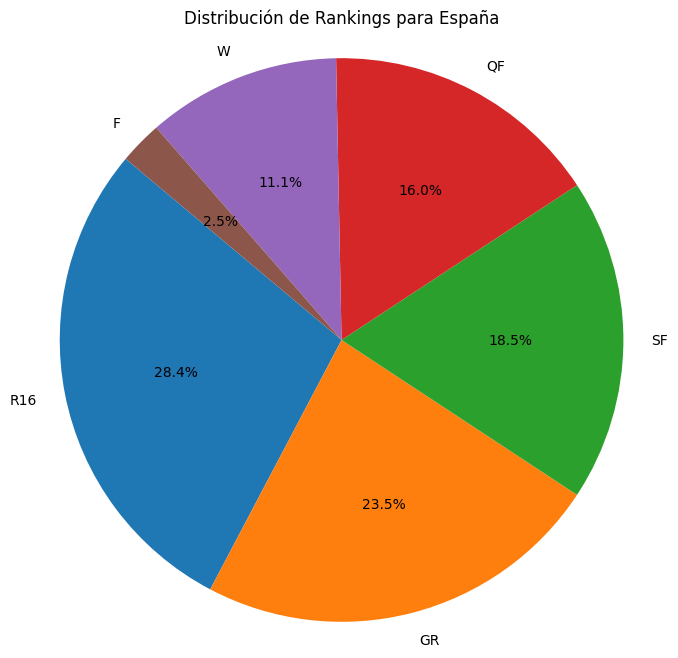

In [300]:
# Filtrar el DataFrame para obtener solo las filas correspondientes al país de interés
pais = 'España' 
datos_esp = overall[overall['Country'] == pais]

# Contar el número de ocurrencias de cada ranking
rankings = datos_esp['Rk'].value_counts()

# Crear el pie chart
plt.figure(figsize=(8, 8))
plt.pie(rankings, labels=rankings.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Rankings para ' + pais)
plt.axis('equal')
plt.show()


Podemos ver qué país ha ganado más puntos.

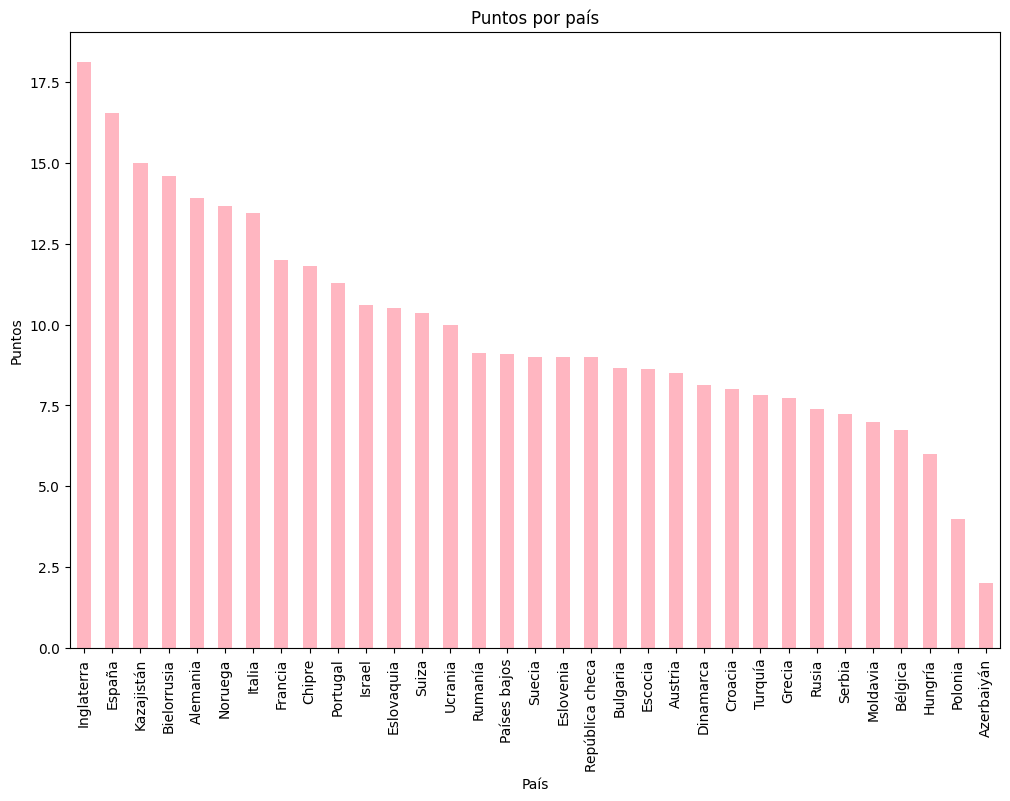

In [303]:
# Primero agrupamos por país 
goles_por_pais = overall.groupby('Country')['Pts'].sum().sort_values(ascending=False)

# Graficamos
plt.figure(figsize=(12, 8))
goles_por_pais.plot(kind='bar', color='lightpink')
plt.title('Puntos por país')
plt.xlabel('País')
plt.ylabel('Puntos')
plt.show()